In [1]:
import pandas as pd; pd.set_option('max_rows', 50, 'max_columns', 100, 'max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns
import warnings; warnings.filterwarnings(action='ignore')

import yfinance as yf # 야후 파이낸스

# 주가 데이터

In [2]:
tickers = ['^KS11', '^GSPC', '^IXIC'] # 코스피, S&P500, NASDAQ
df = yf.download(tickers=tickers, start='2003-07-29', end='2021-10-29')
df = df['Adj Close']
df

[*********************100%***********************]  3 of 3 completed


,^GSPC,^IXIC,^KS11
Date,,,
2003-07-28,996.520020,1735.359985,NaN
2003-07-29,989.280029,1731.369995,722.330017
2003-07-30,987.489990,1720.910034,714.150024
2003-07-31,990.309998,1735.020020,713.520020
2003-08-01,980.150024,1715.619995,727.260010
...,...,...,...
2021-10-22,4544.899902,15090.200195,3006.159912
2021-10-25,4566.479980,15226.709961,3020.540039
2021-10-26,4574.790039,15235.709961,3049.080078


# 변동성 지표 추가

In [3]:
for col in df.columns:
    df[col + '_STDEV'] = df.loc[:, col].rolling(window=20, min_periods=0, center=False).std(ddof=0)
    df[col + '_HV']    = df.loc[:, col].pct_change().rolling(window=20, min_periods=0, center=False).std(ddof=0) * np.sqrt(252)
df

,^GSPC,^IXIC,^KS11,^GSPC_STDEV,^GSPC_HV,^IXIC_STDEV,^IXIC_HV,^KS11_STDEV,^KS11_HV
Date,,,,,,,,,
2003-07-28,996.520020,1735.359985,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN
2003-07-29,989.280029,1731.369995,722.330017,3.619995,0.000000,1.994995,0.000000,0.000000,NaN
2003-07-30,987.489990,1720.910034,714.150024,3.903889,0.043304,6.093092,0.029703,4.089996,0.000000
2003-07-31,990.309998,1735.020020,713.520020,3.397984,0.065658,5.845200,0.095689,4.012830,0.082883
2003-08-01,980.150024,1715.619995,727.260010,5.265642,0.079999,7.971793,0.112805,5.754830,0.201482
...,...,...,...,...,...,...,...,...,...
2021-10-22,4544.899902,15090.200195,3006.159912,78.429541,0.139511,281.730813,0.171554,58.064529,0.164734
2021-10-25,4566.479980,15226.709961,3020.540039,85.183353,0.139351,298.428222,0.172994,49.275797,0.165624
2021-10-26,4574.790039,15235.709961,3049.080078,90.229777,0.114619,314.889437,0.136638,44.897586,0.166076


# DTM merge

In [4]:
date_dtm = pd.read_csv('../nlp/date_dtm.csv').drop(['page', 'index'], axis=1)
date_dtm['date'] = pd.to_datetime(date_dtm['date'])
df = df.merge(date_dtm, left_index=True, right_on='date')
df.set_index('date', inplace=True)
df

,^GSPC,^IXIC,^KS11,^GSPC_STDEV,^GSPC_HV,^IXIC_STDEV,^IXIC_HV,^KS11_STDEV,^KS11_HV,통화,최고,고용,총선,관건,급등,긴장,불안,제재,안심,당선,회복,공매도,주의,그린,팔자,대선,흐름,불구,베팅,개발,강세,우수,블루,동양종금,지연,투자자,부진,대표,개최,해소,교체,경신,소재,리먼,여전,만기,헝다,사망,눈길,불가피,...,과세,껑충,횡보,돌파,러브콜,상한,구제,성장,문제,머스크,금융위기,코로나,사기,추락,수요,협력,일제,개선,침체,가능,일시,의전,쌍끌이,개편,감산,진출,유망,인플레,확진,여파,안정,편입,엎치락뒤치락,역대,지속,인기,불확실,매출,눈앞,우한,통과,하향,정상,후퇴,공시,반락,활성화,긍정,개혁,리치
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-07-28,996.520020,1735.359985,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-07-29,989.280029,1731.369995,722.330017,3.619995,0.000000,1.994995,0.000000,0.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-07-30,987.489990,1720.910034,714.150024,3.903889,0.043304,6.093092,0.029703,4.089996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-07-31,990.309998,1735.020020,713.520020,3.397984,0.065658,5.845200,0.095689,4.012830,0.082883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-08-01,980.150024,1715.619995,727.260010,5.265642,0.079999,7.971793,0.112805,5.754830,0.201482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22,4544.899902,15090.200195,3006.159912,78.429541,0.139511,281.730813,0.171554,58.064529,0.164734,0.0,6.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,3.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,5.0,0.0,0.0,2.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2021-10-25,4566.479980,15226.709961,3020.540039,85.183353,0.139351,298.428222,0.172994,49.275797,0.165624,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,8.0,0.0,1.0,

# 표제어 추출

In [5]:
#변동성에 특징이 있는 단어
# ['외인','부양책','우려','긴급','팬데믹','팔자', '사상', '메타', '경신', '위험','탈환','안정', '순이익','충격','강세', '상승세', '구제', '고용','백신','완화', '접종', '마이너스','변동성', '치료','공매도','매입','상승', '부채','상회','개장','급등','파월','악재','상한', '대출', '후퇴', '발동', '최악','화이자', '투자자','추락', '위기','지속','인하', '매수', '급락', '부담','돌파', '대비','그리스', '도달','헝다', '둔화', '폭발','부양','흐름', '외국인', '카드','공모','금리인하', '역대','출시','외국','급증','부진','통화', '서브프라임','투자','보합','반등','출발', '최고','하락','이익','불안','바이','코로나','금지', '훈풍','폐렴', '인플레', '합의','쇼크','증가','우한','강화','오른','매도','시트','호조','기대','갈등','목표','폭락','회복','독점','머스크','메르스','게임스탑','유지','골든','배열','호전','서학','정상','규제','유행','조정','인플레이션','붕괴','과대','확대','수익','일부','일제','실업','패닉','대선','양적완화','동학','재개','관심','동결','블루','약세','주시','금융위기','델타','변동','연금','우위','확산','감소','주목','브렉','매출','공포','디폴트','테이퍼링','천스닥','악화','사망','레버리지',]

# 변동성 지표와 양의 상관도 높은 상위 10개 단어
# 변동성 지표와 음의 상관도 높은 상위 10개 단어 -> 변동성 지표의 움직임과 큰 상관성을 보이지 않음

In [6]:
headword_corr = df.corr().iloc[9:, 3:9]
headword_corr

,^GSPC_STDEV,^GSPC_HV,^IXIC_STDEV,^IXIC_HV,^KS11_STDEV,^KS11_HV
통화,0.127767,0.015435,0.108514,0.011709,0.054929,-0.017357
최고,0.036438,-0.126036,0.121494,-0.135668,0.040817,-0.162205
고용,0.046679,-0.033853,0.096135,-0.042968,0.003793,-0.071569
총선,0.018081,0.010251,0.010273,0.006561,0.003331,0.000583
관건,0.038939,0.030384,0.045284,0.023818,0.009407,0.008863
...,...,...,...,...,...,...
반락,0.096527,0.020452,0.111267,0.020045,0.072950,-0.009161
활성화,0.051623,-0.042310,0.058487,-0.043607,-0.019500,-0.079092
긍정,0.083767,-0.028966,0.124149,-0.030454,0.021718,-0.049471
개혁,-0.013398,-0.050581,-0.010980,-0.060509,-0.050997,-0.080862


In [7]:
corr_top10 = []
corr_neg10  = []
for col in headword_corr.columns:
    corr_top10.append(headword_corr.sort_values(col, ascending=False).index[:10].tolist())
    corr_neg10.append(headword_corr.sort_values(col, ascending=True).index[:10].tolist())

In [8]:
corr_top10 # 양의 상관도 높은 상위 10개 단어

[['코로나', '매도', '상승', '출발', '매수', '외국인', '흐름', '강세', '우위', '배열'],
 ['위기', '반등', '코로나', '급등', '폭락', '바닥', '발동', '회복', '부양', '금융위기'],
 ['출발', '코로나', '매도', '상승', '매수', '외국인', '강세', '외국', '우위', '부양'],
 ['코로나', '반등', '위기', '폭락', '급등', '부양', '바닥', '부양책', '흐름', '발동'],
 ['코로나', '반등', '급등', '부양책', '부양', '동학', '폭락', '급락', '폭등', '바닥'],
 ['투자자', '화제', '위기', '급등', '코로나', '경색', '바닥', '폭등', '구제', '반등']]

In [9]:
corr_neg10 # 음의 상관도 높은 상위 10개 단어

[['화제', '투자자', '가소', '의전', '카드', '블루칩', '손보', '호전', '관심', '동양종금'],
 ['카드', '최고', '손보', '신청', '사상', '가소', '호조', '공시', '출시', '가시'],
 ['화제', '투자자', '가소', '동양종금', '의전', '블루칩', '이하', '호전', '반전', '관심'],
 ['카드', '최고', '가소', '손보', '출시', '사상', '공시', '신청', '가시', '호조'],
 ['카드', '가소', '와락', '공시', '손보', '가시', '우투', '구조조정', '의전', '사드'],
 ['신청', '카드', '출시', '출발', '최고', '부진', '가시', '가소', '오른', '개최']]

# 시각화 확인

In [10]:
corr_top10 = list(set(np.array(corr_top10).reshape(-1)))
print(corr_top10)

['폭등', '회복', '코로나', '화제', '반등', '구제', '외국인', '배열', '경색', '강세', '바닥', '흐름', '위기', '금융위기', '출발', '부양', '폭락', '동학', '매도', '우위', '상승', '발동', '투자자', '급등', '급락', '외국', '매수', '부양책']


In [11]:
df['sum_word'] = df[corr_top10].sum(axis=1)

In [12]:
# 그림 확인 결과 최종 표제어 선정
headwords = ['긴급','탈환','구제','변동성','추락','위기','서브프라임','인플레','호전','과대','패닉','관심','금융위기','변동','코로나','폭락','위기']
df['sum_word'] = df[headwords].sum(axis=1)

<AxesSubplot:xlabel='date', ylabel='^KS11_HV'>

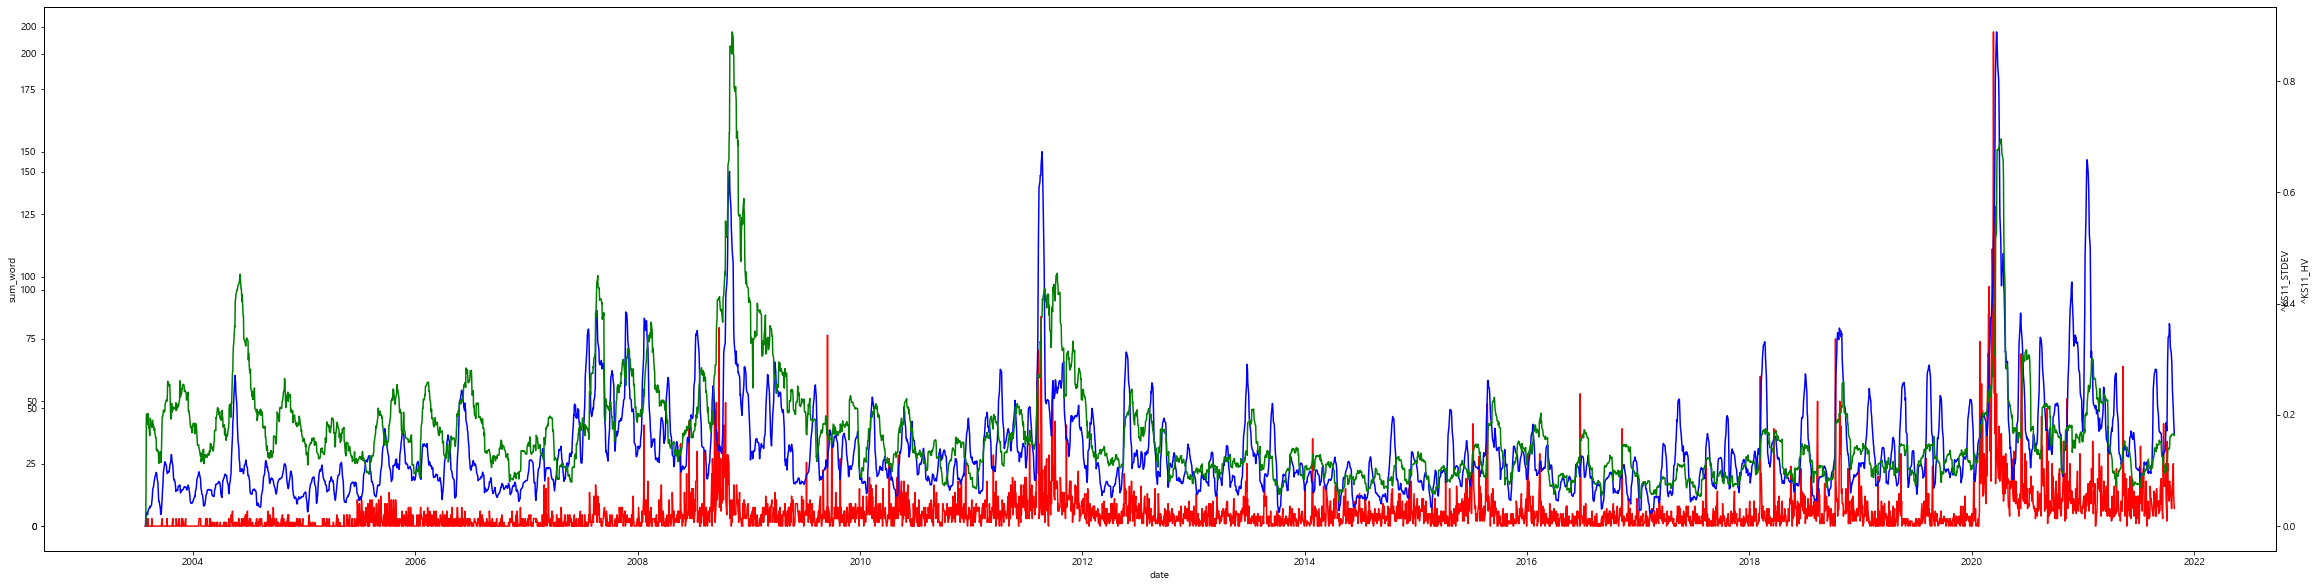

In [13]:
fig, ax1 = plt.subplots(figsize=(40, 10))
ax2 = ax1.twinx()
ax3 = ax2.twinx()

sns.lineplot(ax=ax1, color='r', y='sum_word', x=df.index, data=df)
sns.lineplot(ax=ax2, color='b', y='^KS11_STDEV', x=df.index, data=df)
sns.lineplot(ax=ax3, color='g', y='^KS11_HV', x=df.index, data=df)

<AxesSubplot:xlabel='date', ylabel='^GSPC_HV'>

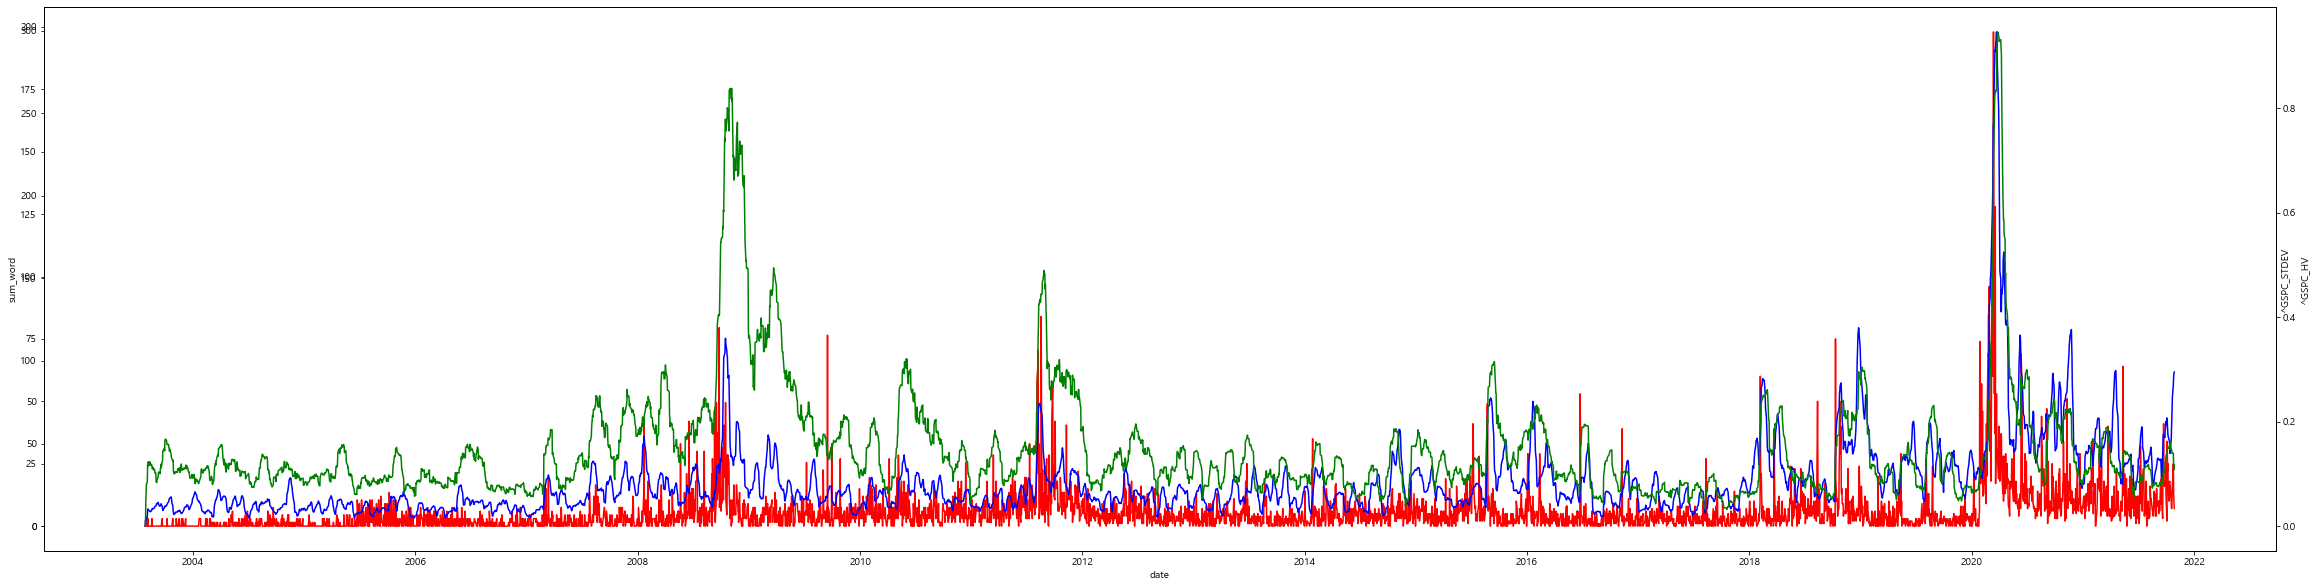

In [14]:
fig, ax1 = plt.subplots(figsize=(40, 10))
ax2 = ax1.twinx()
ax3 = ax2.twinx()

sns.lineplot(ax=ax1, color='r', y='sum_word', x=df.index, data=df)
sns.lineplot(ax=ax2, color='b', y='^GSPC_STDEV', x=df.index, data=df)
sns.lineplot(ax=ax3, color='g', y='^GSPC_HV', x=df.index, data=df)

<AxesSubplot:xlabel='date', ylabel='^IXIC_HV'>

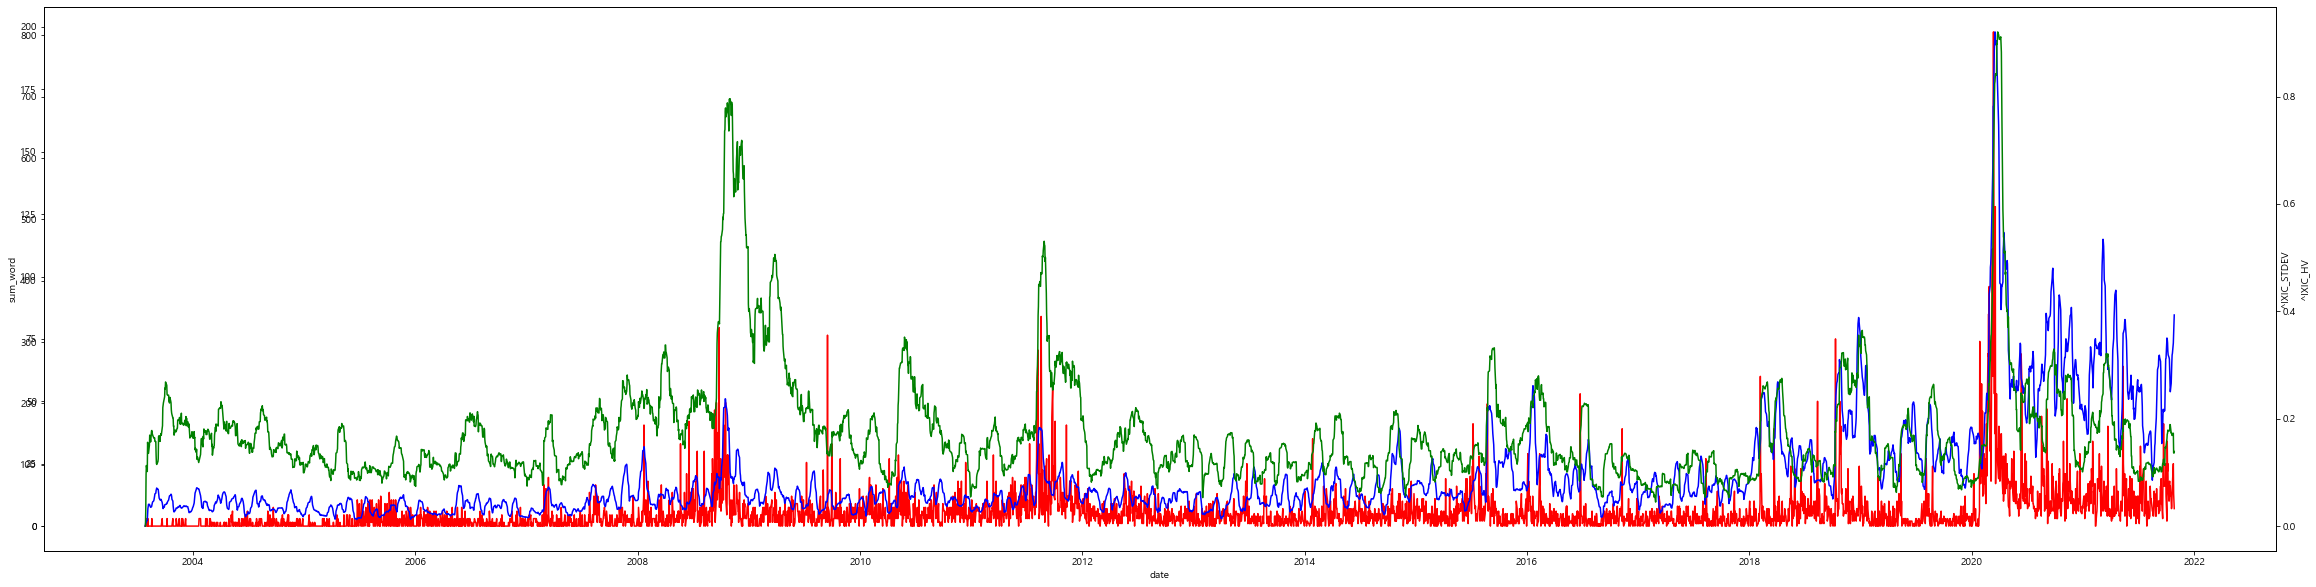

In [15]:
fig, ax1 = plt.subplots(figsize=(40, 10))
ax2 = ax1.twinx()
ax3 = ax2.twinx()

sns.lineplot(ax=ax1, color='r', y='sum_word', x=df.index, data=df)
sns.lineplot(ax=ax2, color='b', y='^IXIC_STDEV', x=df.index, data=df)
sns.lineplot(ax=ax3, color='g', y='^IXIC_HV', x=df.index, data=df)

In [16]:
df.iloc[:, [3, 4, 5, 6, 7, 8, -1]].corr().iloc[:, -1:]

,sum_word
^GSPC_STDEV,0.525196
^GSPC_HV,0.344123
^IXIC_STDEV,0.498300
^IXIC_HV,0.331809
^KS11_STDEV,0.401055
^KS11_HV,0.217968
sum_word,1.000000


In [19]:
df[['sum_word']].to_csv('../backtest/sum_word.csv')